In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import geodatasets as gd
import xarray as xr
import pandas as pd

# load the low resolution world map
world = gpd.read_file(gd.get_path("naturalearth.land"))

In [ ]:
df = xr.open_dataset("../data/downloads/aa751f11706452fa08007402436a45cb/20030301-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.3.nc")

df

In [74]:
lat, long, co2, date = ([], [], [], [])
year=2005
for i in range(3,12,1):
    try:
        xr.open_dataset(f"../data/downloads/aa751f11706452fa08007402436a45cb/{year}0{i}01-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.3.nc")
    except:
        continue
    else:
       df=xr.open_dataset(f"../data/downloads/aa751f11706452fa08007402436a45cb/{year}0{i}01-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.3.nc")
    lat.append(df.latitude.values)
    long.append(df.longitude.values)
    co2.append(df.xco2.values)
    date.append(["2003-"+str(i)]*len(df.longitude.values))

df2 = dict()
df2["long"] = np.concat(long)
df2["lat"] = np.concat(lat)
df2["co2"] = np.concat(co2)
df2["date"] = np.concat(date)

df2 = pd.DataFrame(df2)

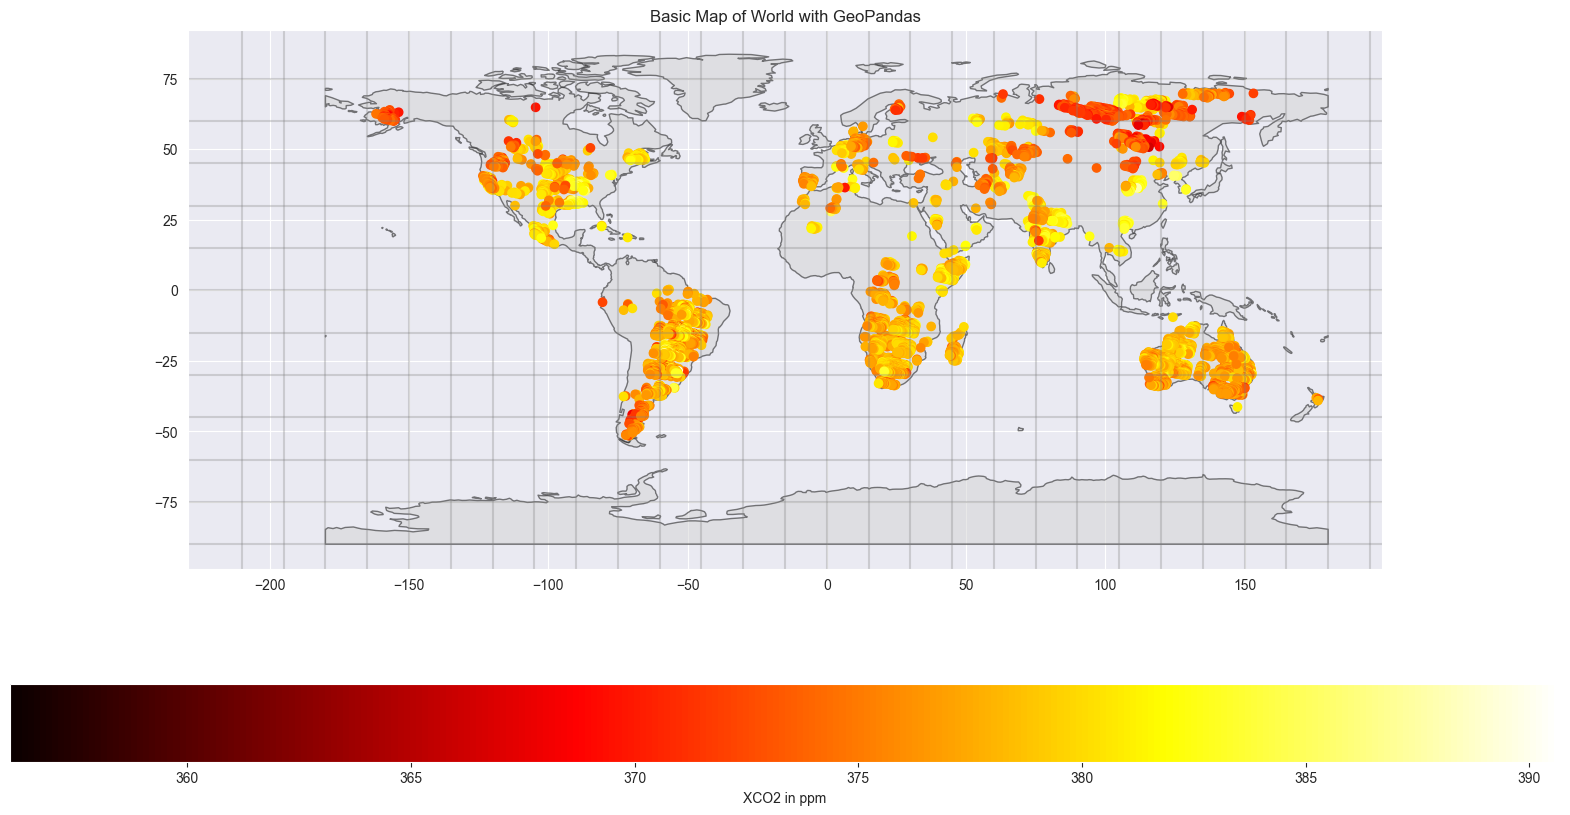

In [75]:
plot_map(df2)

In [151]:
def plot_map(df2):
    gdf = gpd.GeoDataFrame(
        df2, geometry=gpd.points_from_xy(df2.long, df2.lat), crs="EPSG:4326",
    )
    # initialize an empty figure and add an axis
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()

    # plot a basic map of the world
    world.plot(
        ax=ax,
        color="lightgray",
        edgecolor="black",
        alpha=0.5
    )

    gdf.plot(column="co2", ax=ax, legend=True, cmap="cool", markersize=2, alpha=0.1,
             legend_kwds={'label': "XCO2 in ppm", 'orientation': 'horizontal'}, vmax=390, vmin= 370)

    # turn off axis ticks
    [ax.axhline(y=i, color="grey", alpha=0.3) for i in np.arange(-90,90,15)]
    [ax.axvline(x=i, color="grey", alpha=0.3) for i in np.arange(-210,210,15)]
    # set the plot title
    plt.title(f"CO2 in ppm for {np.unique(df2['year'])[0]}/{np.unique(df2['month'])[0]}")
    plt.show()




In [177]:
def func_plot(df, i):
    plt.ion()
    df2 = df[df.month == i]
    gdf = gpd.GeoDataFrame(
        df2, geometry=gpd.points_from_xy(df2.long, df2.lat), crs="EPSG:4326",
    )

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()

    # plot a basic map of the world
    world.plot(
        ax=ax,
        color="lightgray",
        edgecolor="black",
        alpha=0.5
    )

    gdf.plot(column="co2", ax=ax, legend=True, cmap="cool", markersize=2, alpha=0.1,
             legend_kwds={'label': "XCO2 in ppm", 'orientation': 'horizontal'}, vmax=390, vmin= 370)
    # turn off axis ticks
    [ax.axhline(y=i, color="grey", alpha=0.3) for i in np.arange(-90,90,15)]
    [ax.axvline(x=i, color="grey", alpha=0.3) for i in np.arange(-210,210,15)]
    # set the plot title
    plt.title(f"CO2 in ppm for {np.unique(df2['year'])[0]}/{np.unique(df2['month'])[0]}")
    return fig

Using matplotlib backend: module://matplotlib_inline.backend_inline


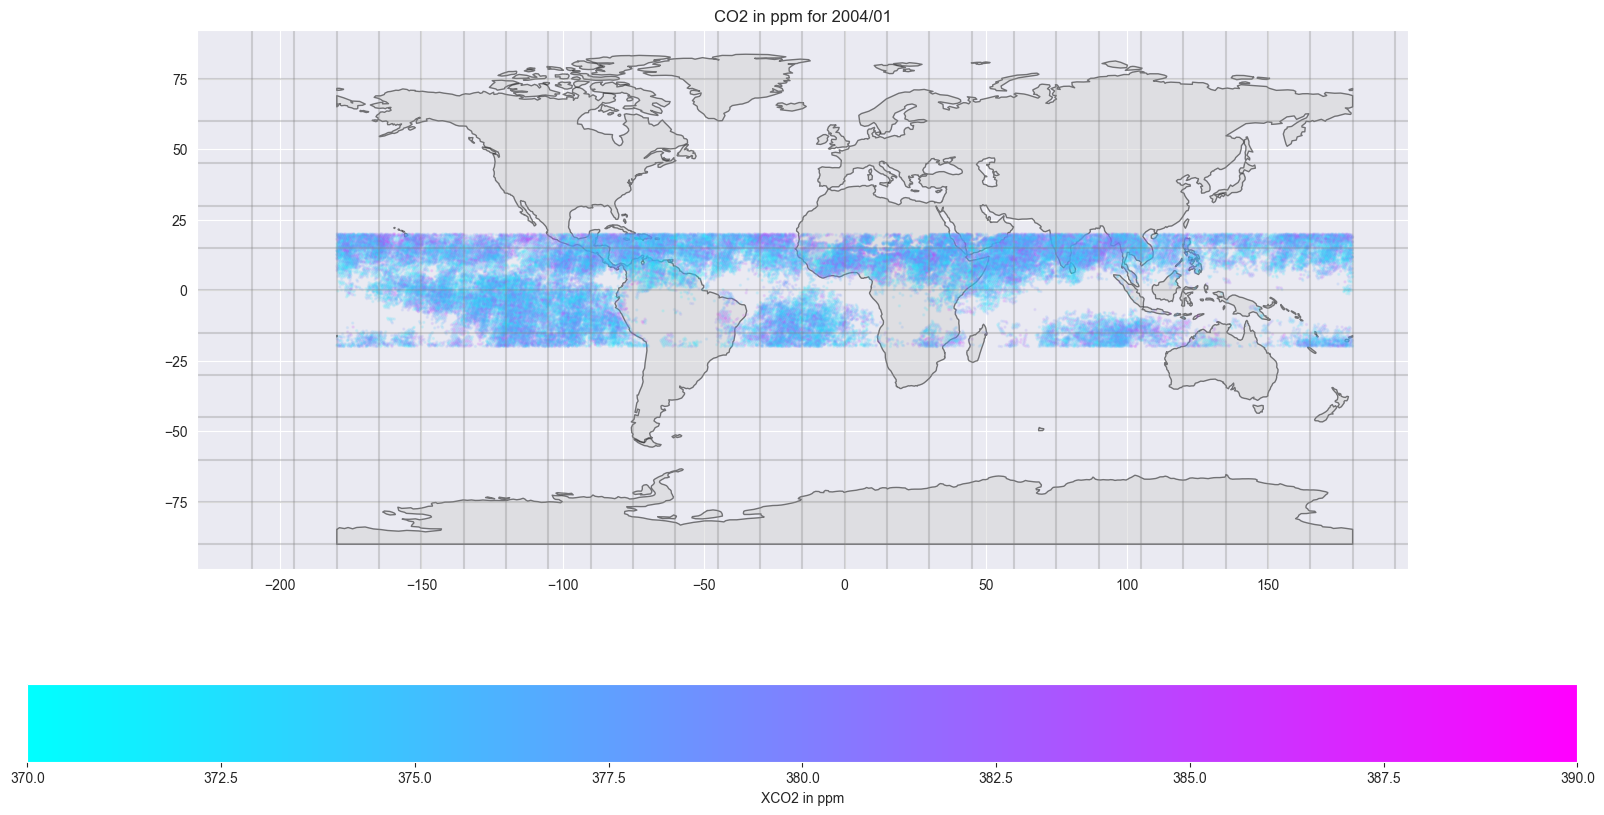

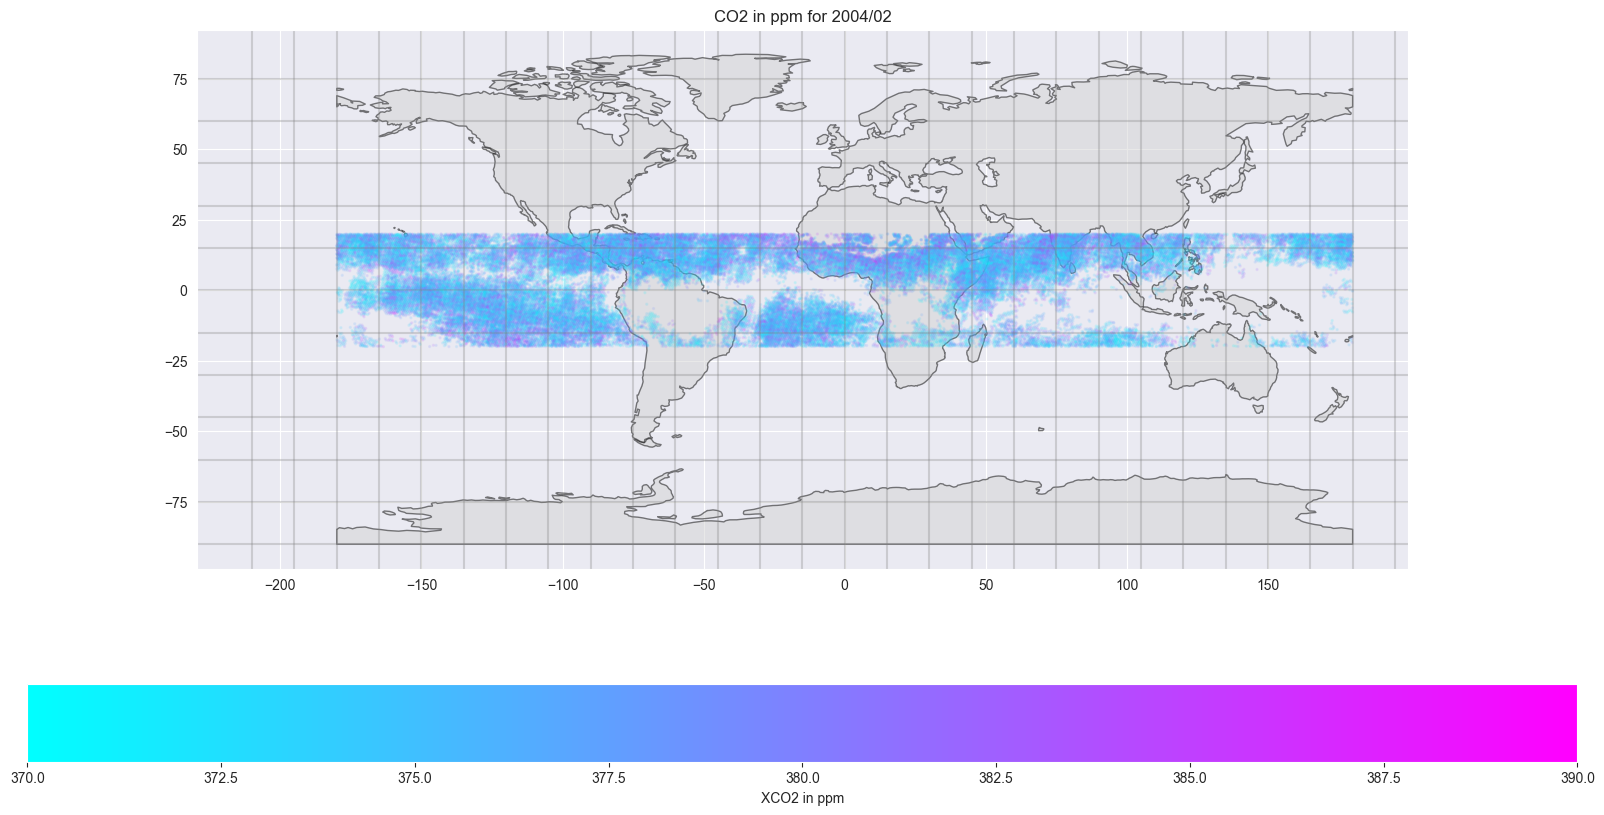

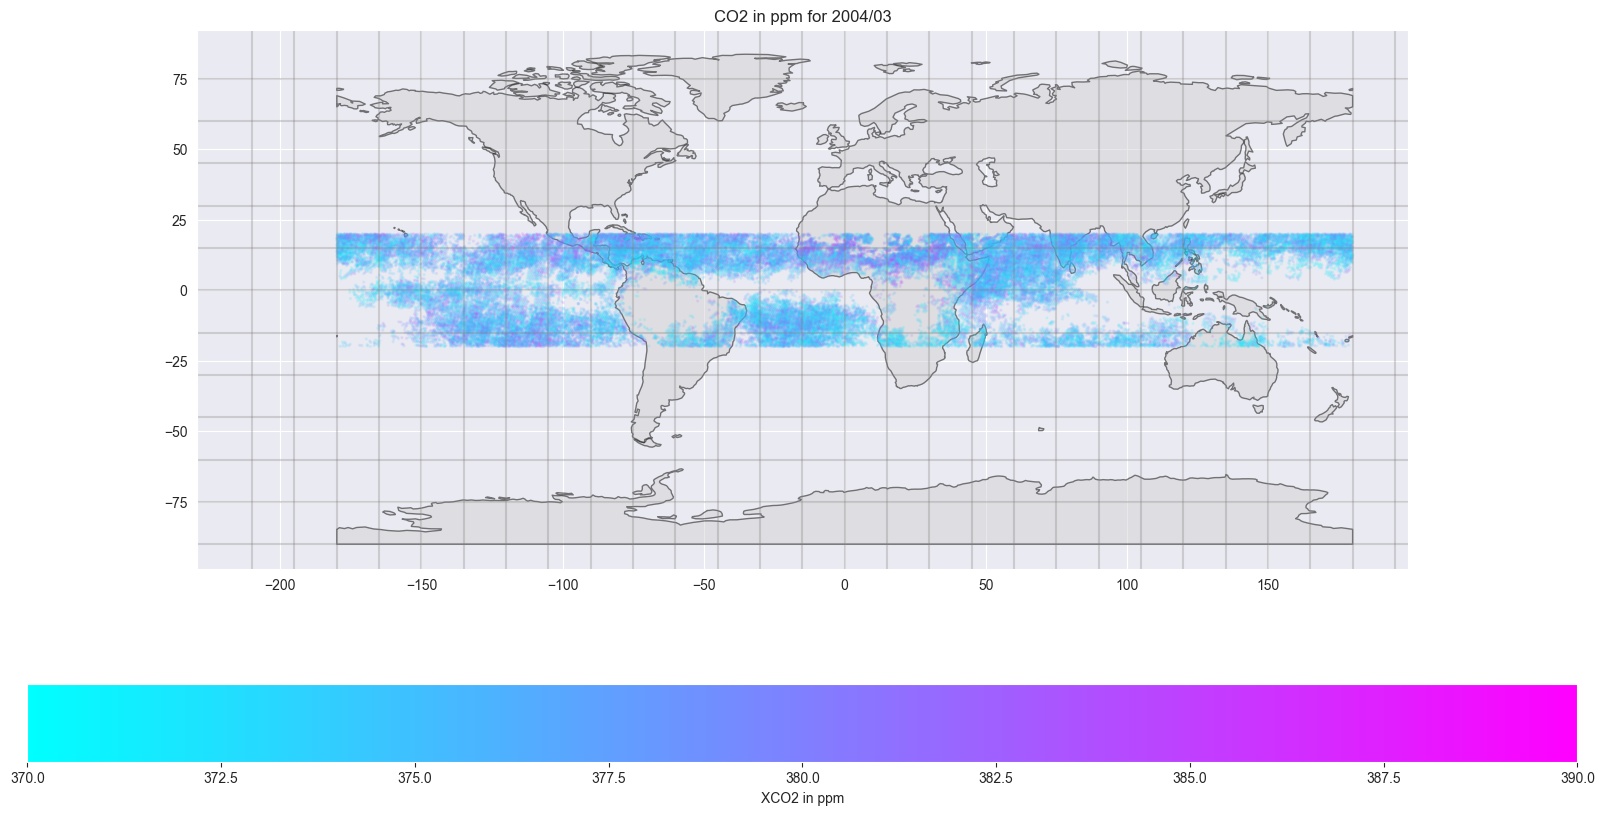

In [178]:
%matplotlib
import time
from IPython.display import display

from matplotlib.animation import FuncAnimation
# initialize an empty figure and add an axis
plt.ion()

fig = func_plot(df, "01")

for i in [f"0{i}" for i in [2,3]]:#range(1,10)]+["10","11","12"]:

    fig = func_plot(df, i)
    plt.show()

    #fig.canvas.draw()

    #fig.canvas.flush_events()

    time.sleep(0.1)



In [ ]:
from matplotlib.animation import FuncAnimation

In [139]:
import os

lat, long, co2, year, month = ([], [], [], [], [])
path = "../data/downloads/30e7ca145a49496e137a0ce5b6c1295"
files = os.listdir(path)


for file in files:
    for mon in [f"0{i}" for i in range(1,10)]+["10","11","12"]:
        if (file[:4] == "2004") and (file[4:6] == str(mon)):
            try:
                xr.open_dataset(f"{path}/{file}")
            except:
                continue
            else:
                df=xr.open_dataset(f"{path}/{file}")

            lat.append(df.latitude.values)
            long.append(df.longitude.values)
            co2.append(df.co2.values)
            year.append([file[:4]]*len(df.longitude.values))
            month.append([file[4:6]]*len(df.longitude.values))
        #if (file[4:6] == "04"):
        #    break

df2 = dict()
df2["long"] = np.concat(long)
df2["lat"] = np.concat(lat)
df2["co2"] = np.concat(co2)
df2["year"] = np.concat(year)
df2["month"] = np.concat(month)

#print(df2)

df = pd.DataFrame(df2)



In [141]:
np.max(df.co2)

np.float32(388.74)

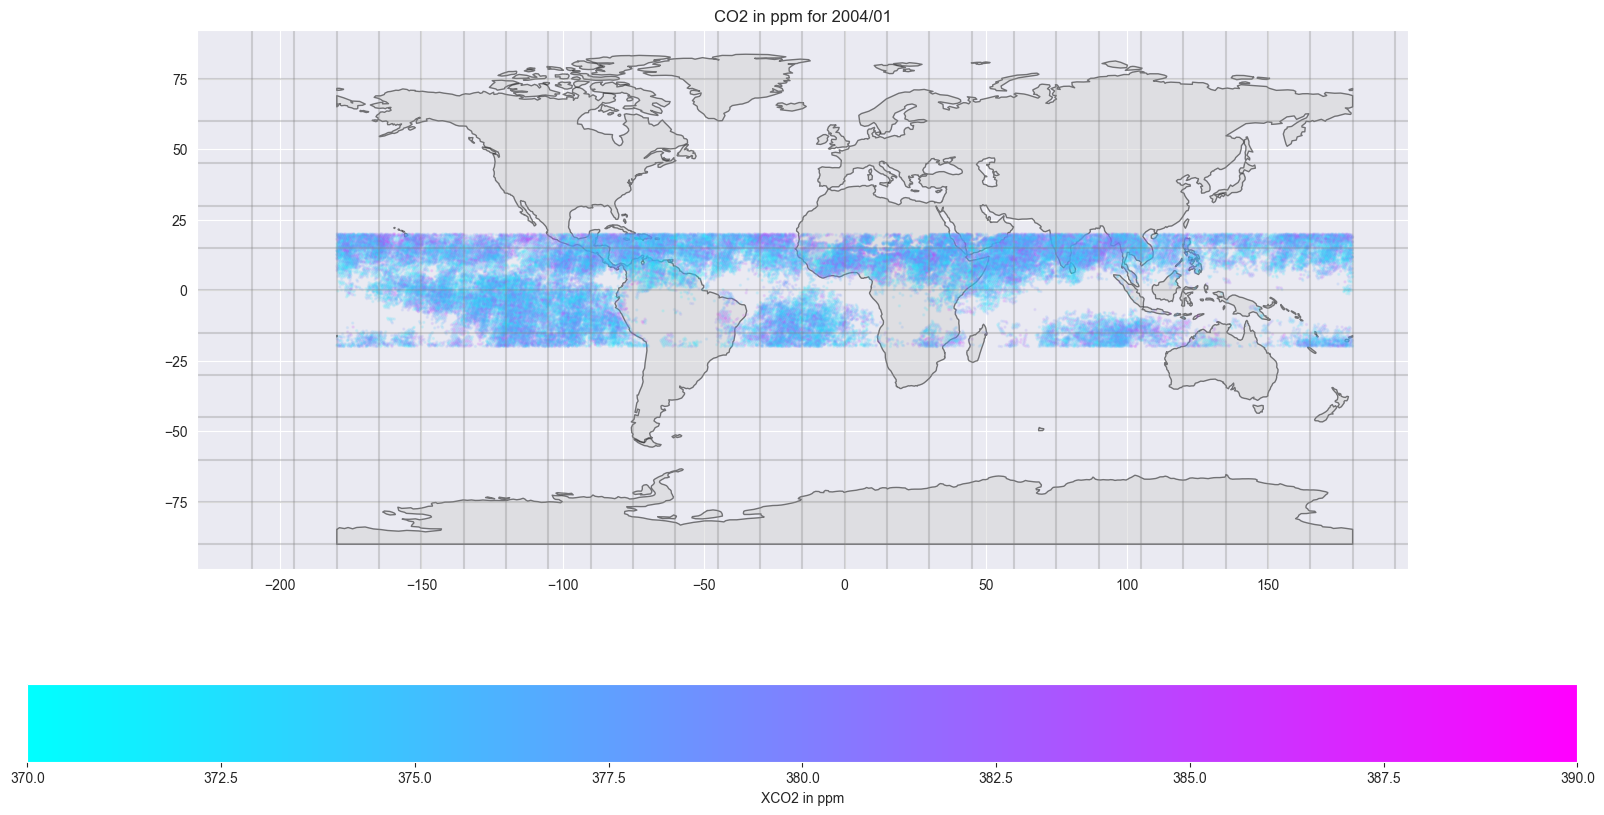

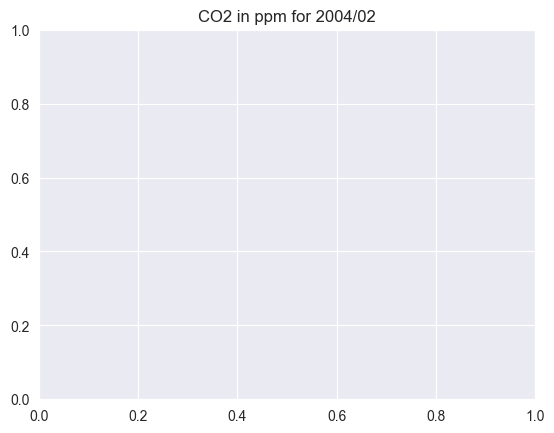

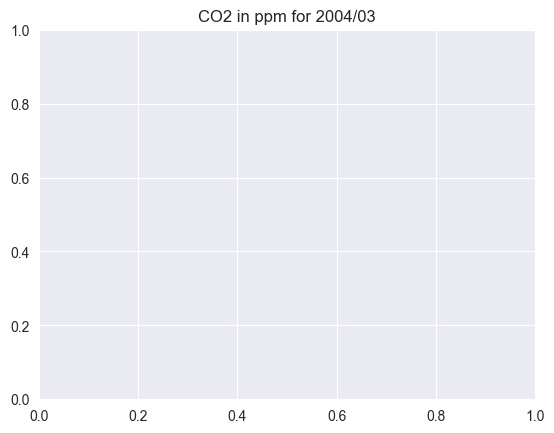

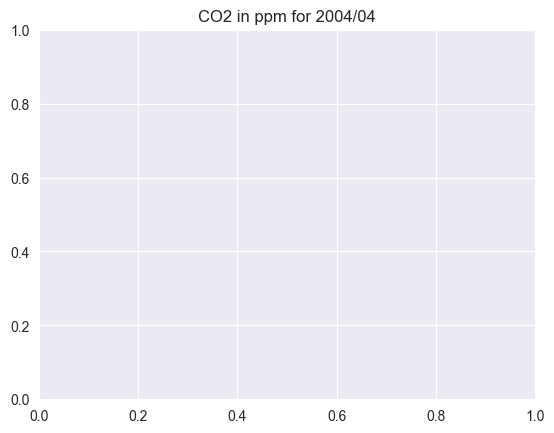

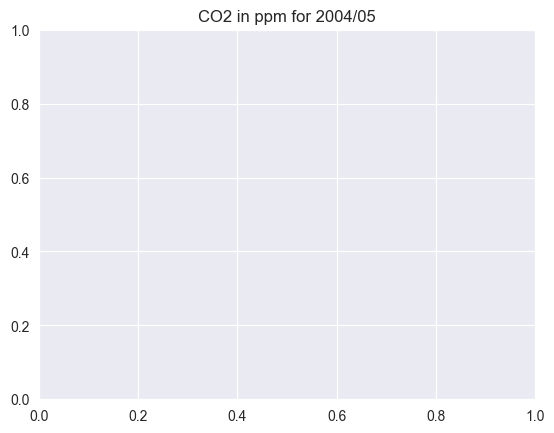

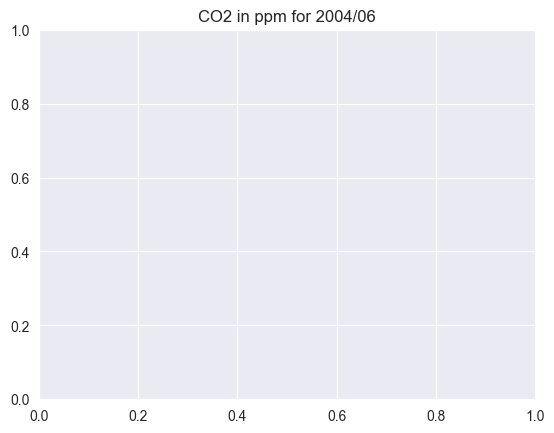

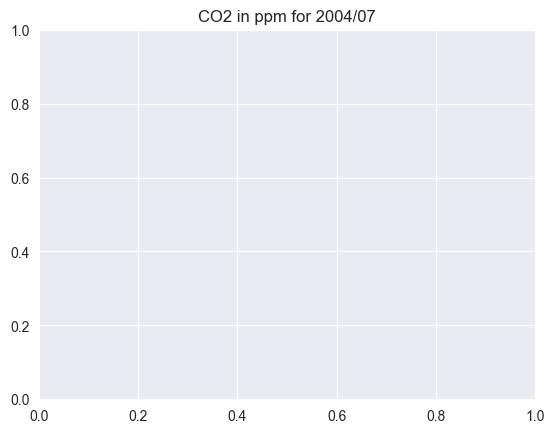

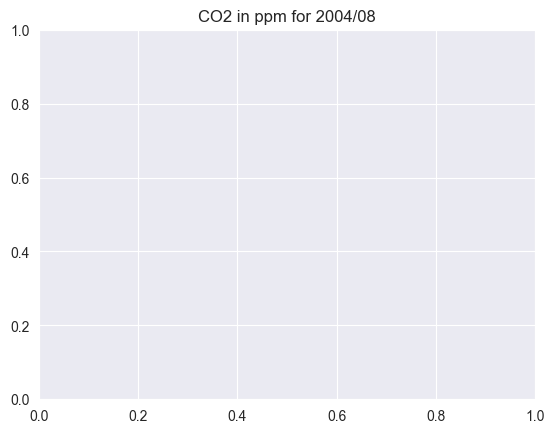

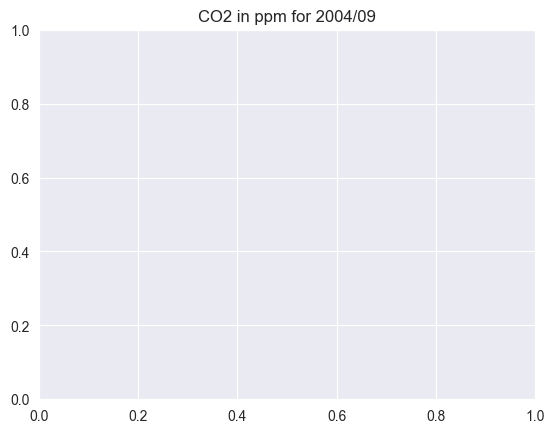

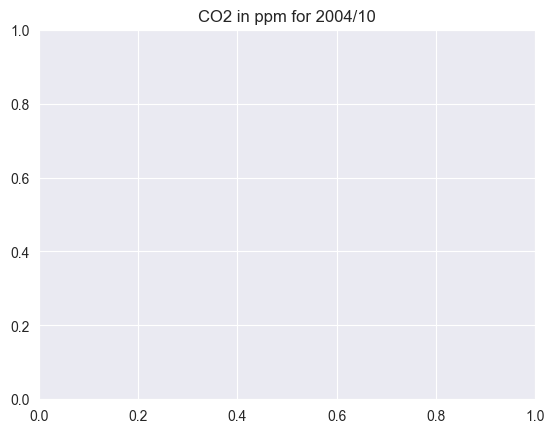

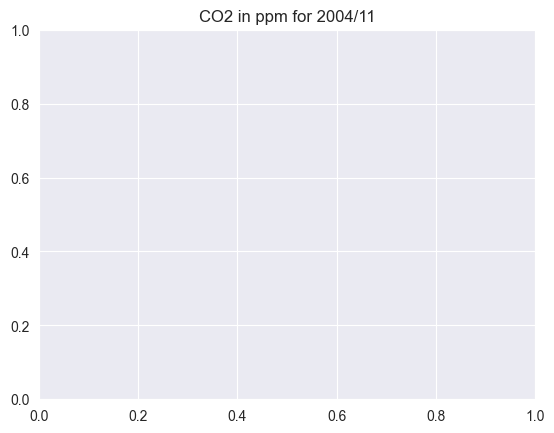

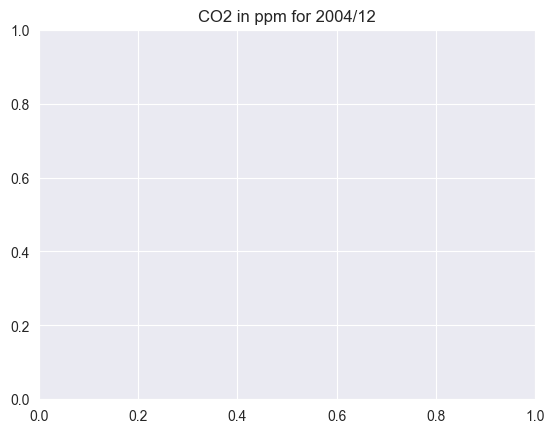

In [150]:
# initialize an empty figure and add an axis
plt.ion()
fig = plt.figure(figsize=(20, 10))

for i in [f"0{i}" for i in range(1,10)]+["10","11","12"]:

    df_selected = df[df.month == i]

    plot_map(fig, df_selected)



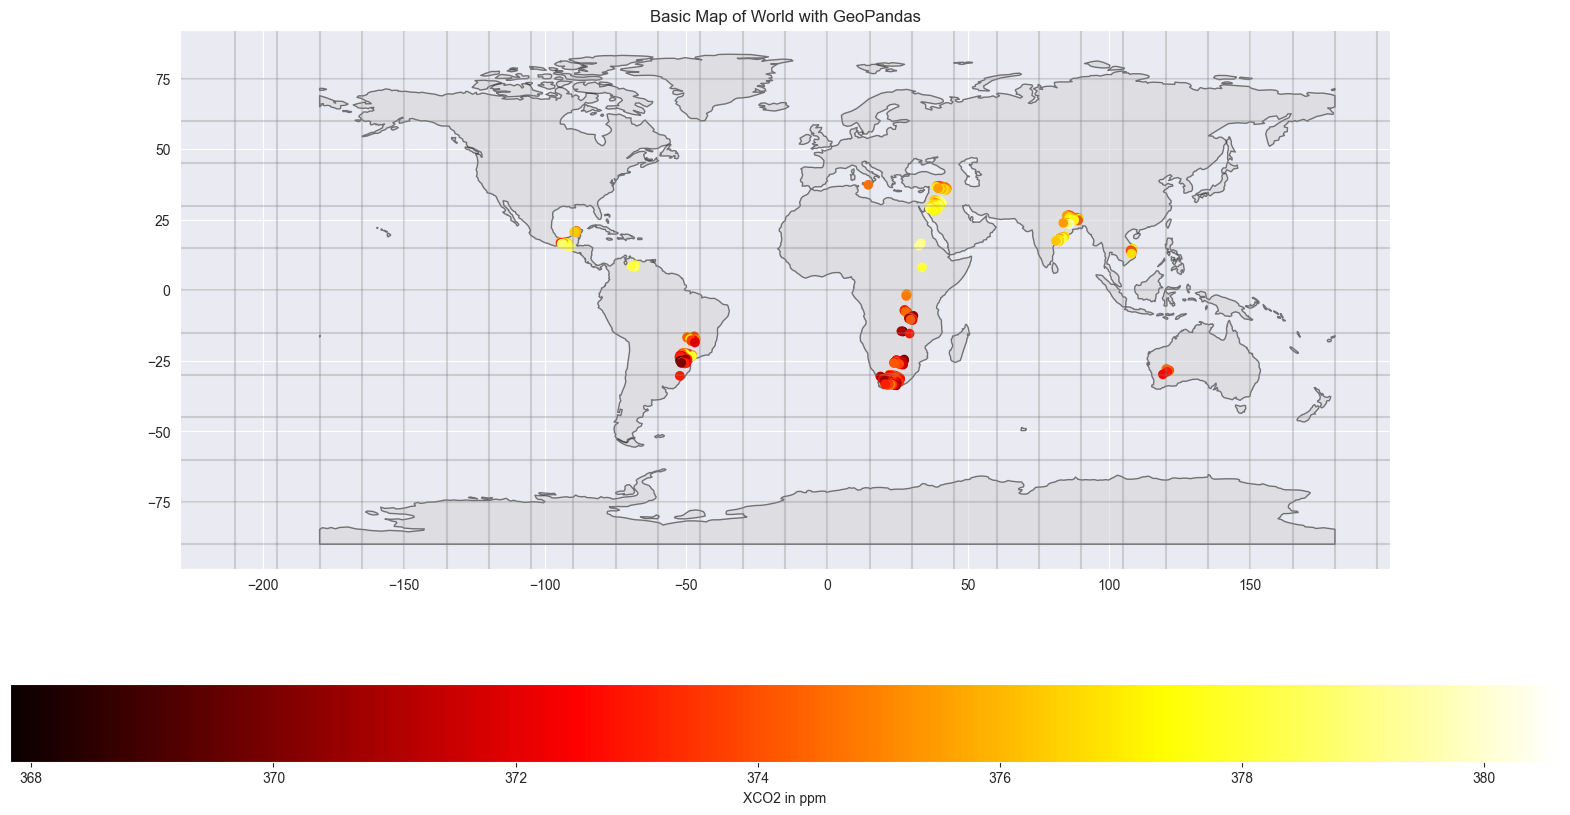

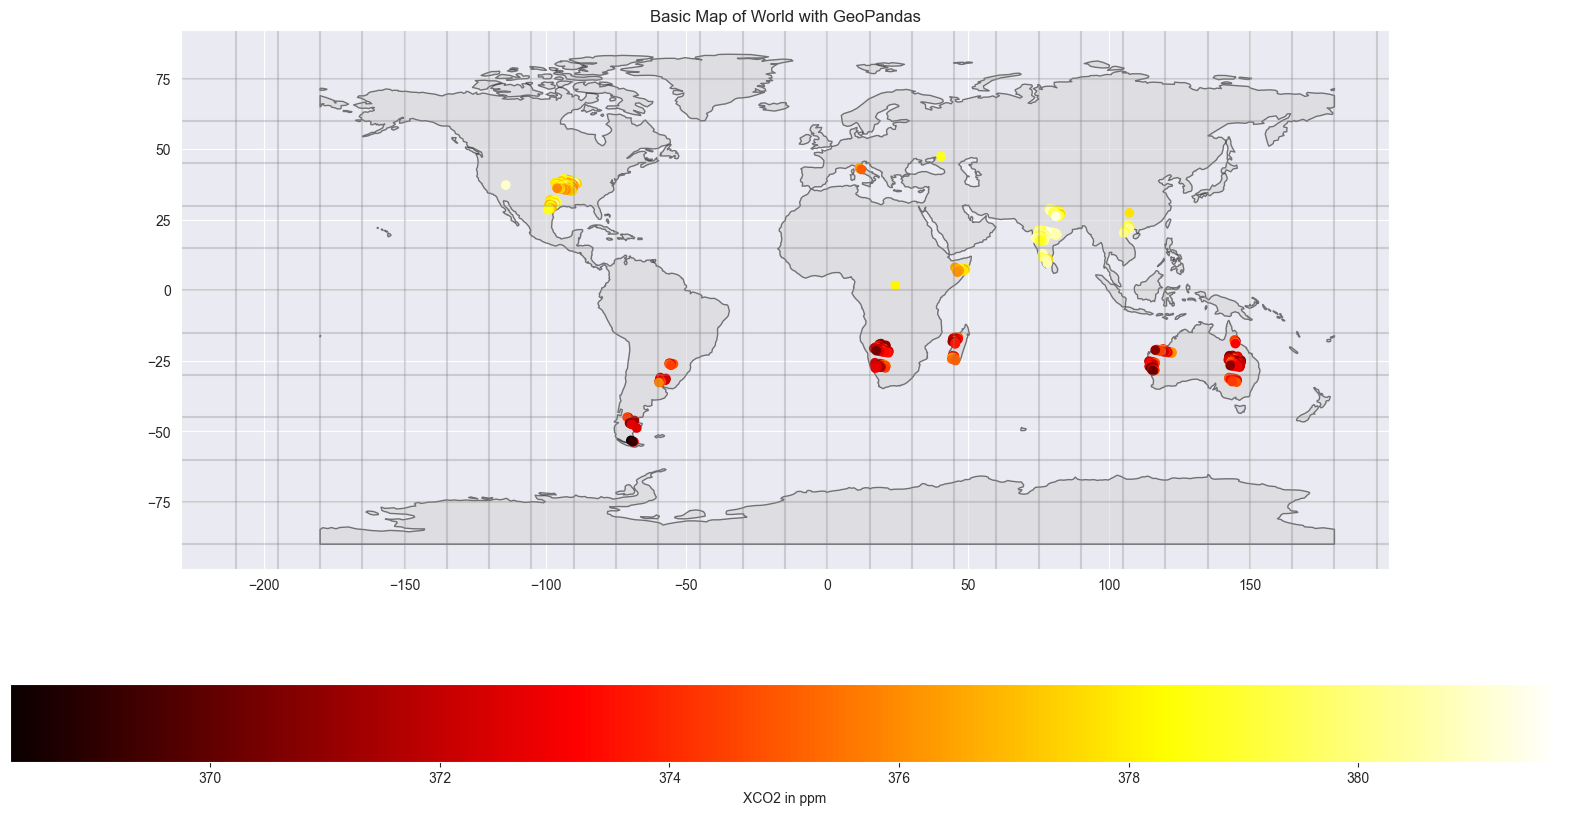

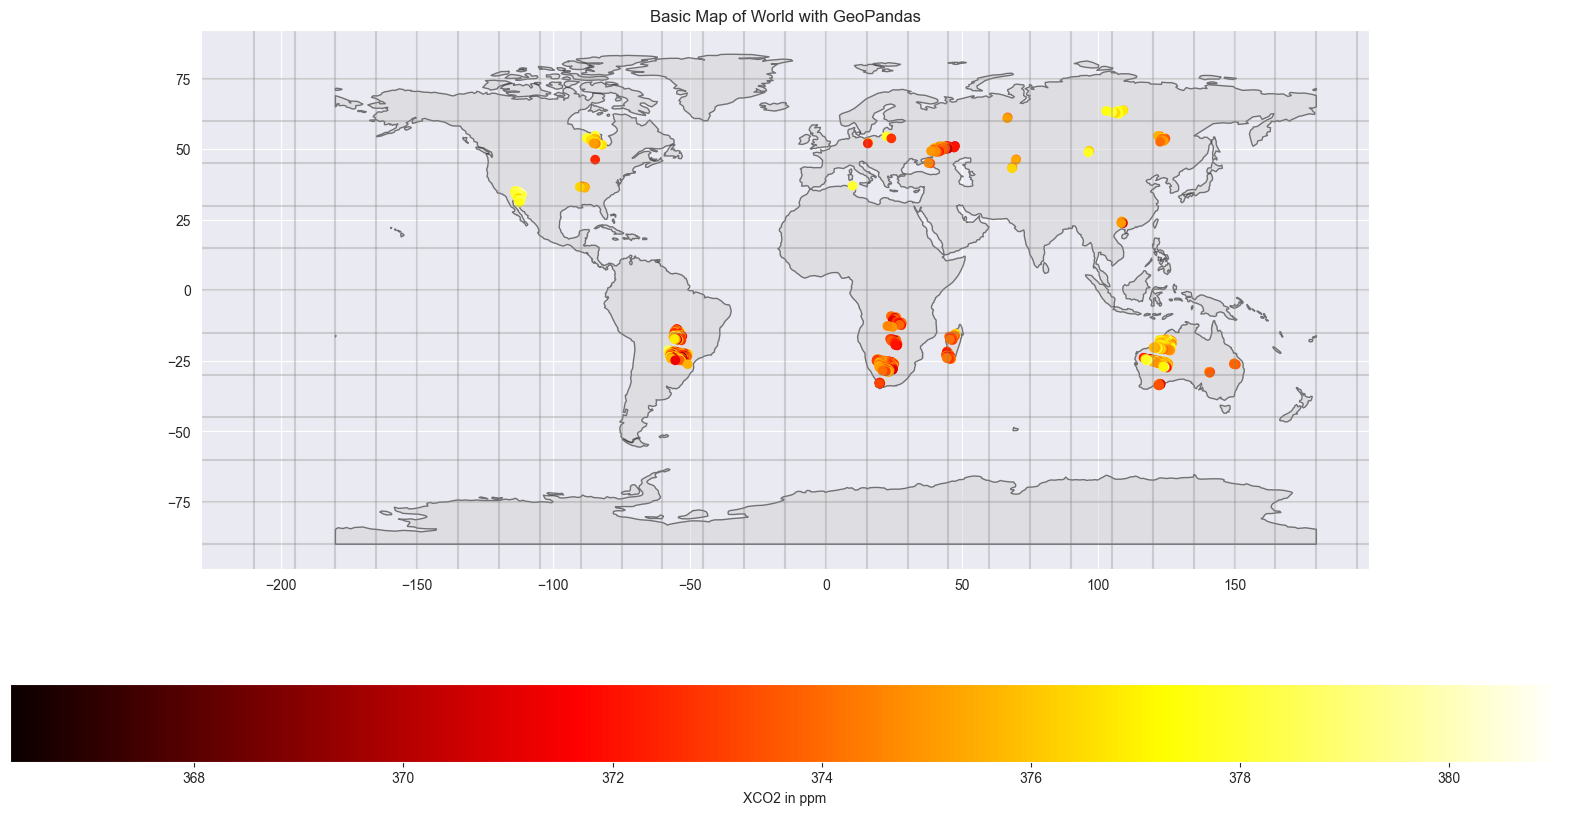

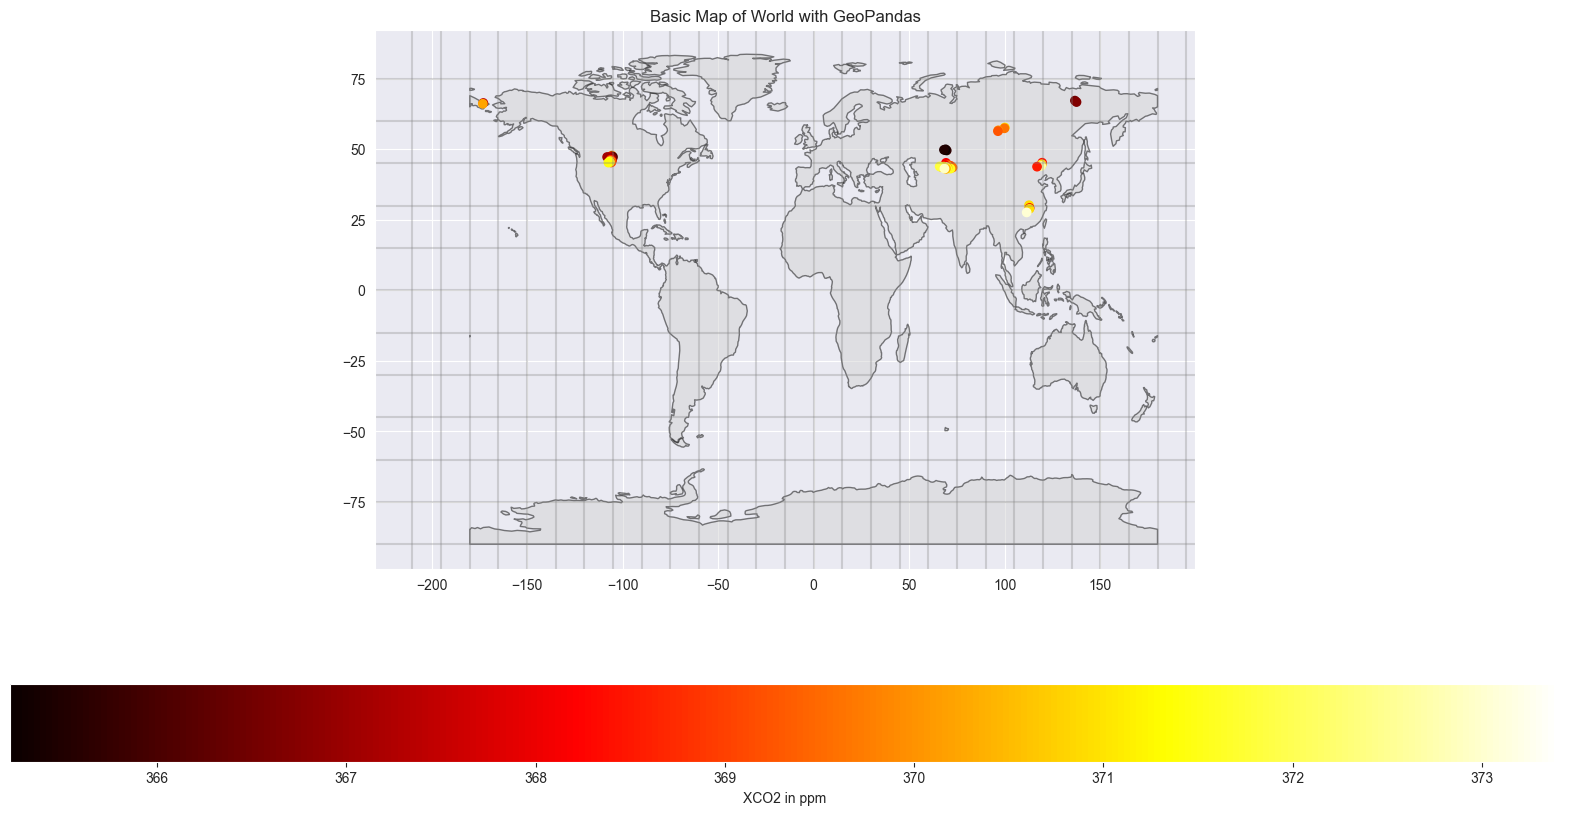

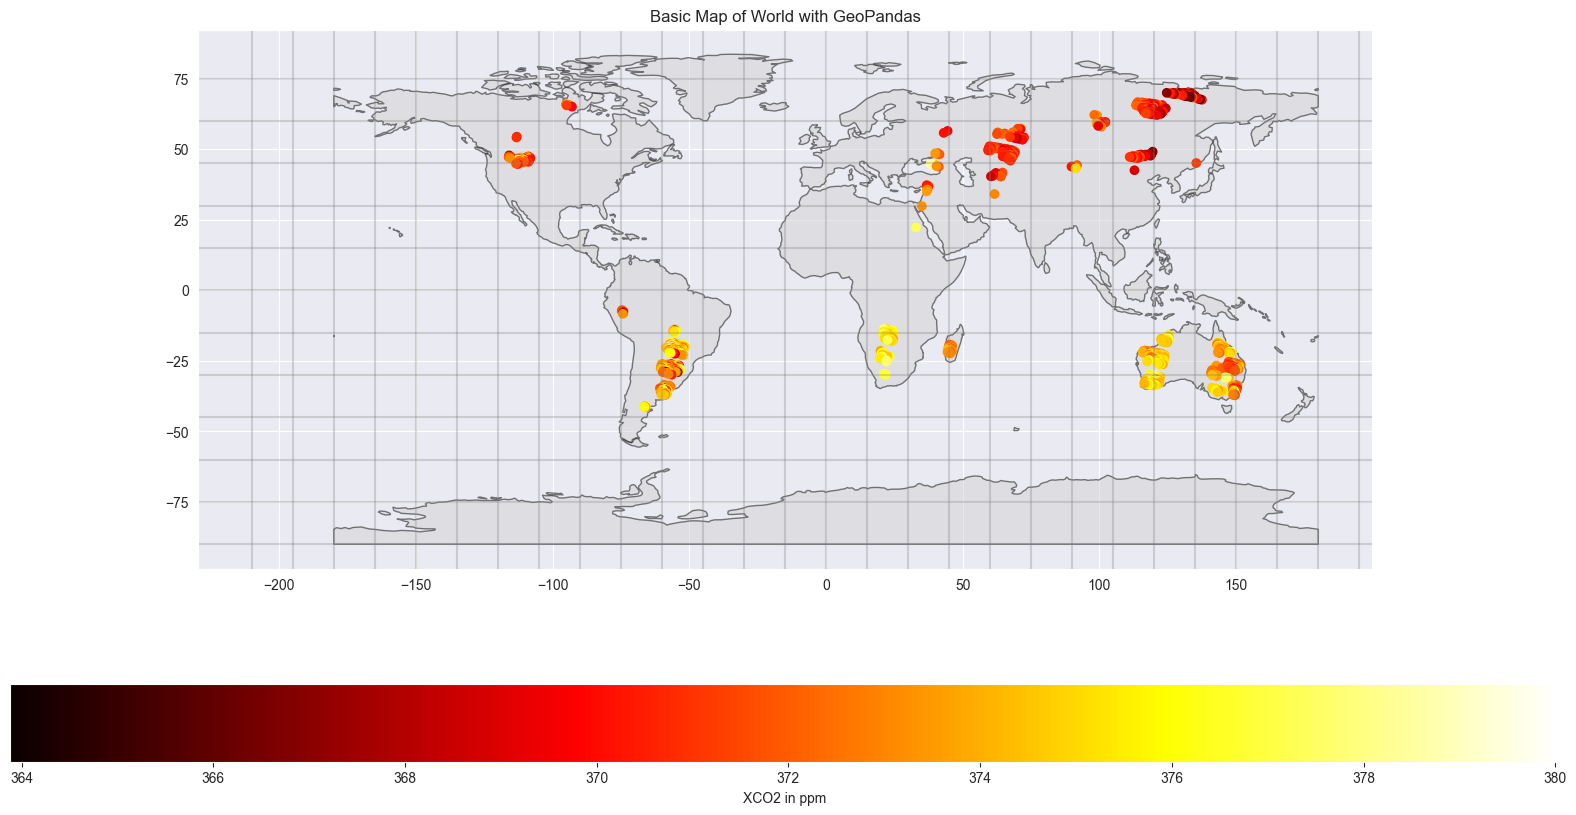

In [68]:
for i in range(3,10,1):
    try:
        xr.open_dataset(f"../data/downloads/aa751f11706452fa08007402436a45cb/20030{i}01-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.3.nc")
    except:
        continue
    else:
        df=xr.open_dataset(f"../data/downloads/aa751f11706452fa08007402436a45cb/20030{i}01-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.3.nc")

    df2=pd.DataFrame(dict(
        lat = df.latitude.values,
        long = df.longitude.values,
        co2 = df.xco2.values,
    ))

    plot_map(df2)

